# Semana 5

## Threading

### Introducción

En esta semana, vamos a aprender sobre threading en Python. Threading es una técnica que permite a un programa realizar múltiples tareas simultáneamente. En Python, el módulo `threading` proporciona una forma sencilla de crear y administrar hilos.

Cada vez que queremos que el usario ingrese algo con 'input' hay que esperar que este responda.

Mientras no lo haga hay que esperar y nuestro porgrama se va a aopausar.


### Procesos y nucleos

COmo se ejecutan las instrucciones? Un nuculeo (core) leee nuestra instruccion y la ejecuta. Si tenemos un solo nucleo, solo podemos ejecutar una instruccion a la vez. Si tenemos mas de un nucleo, podemos ejecutar mas de una instruccion a la vez. CUando hay más procesos que la cantidad de nucleos estos se ponen en cola.

### Threading 

Un thread o hilo es una unidad de ejecución de código dentro de un proceso. Si un proceso es el programa cargado en la memoria del computador, con su código y variables, un ~thread~ lleva la cuennta de ene que parte del codigo estamos ejecutnaod en un momento dado.


Cuando se crea un proceso tiene Al menos un Thread.
A este le llamamos **thread primncipal**

Cada uno lleba su registron de **variables locales** y en que parte del programa estamos.

gracias al OS cada thread tiene su porcion de tiempo para ejecutarse en el nucleo del procesador. y podemos ver que varios threads de ejecutan de manera simultanea(paralela) 

LA desicion de que thread se ejecuta acontinuacion ** y por cuanto tiempo ** Se llama **Thread scheduling o time slicing** 

Funciona así:

1. Se escoge el thread  principal
2. Se ejecuta por un tiempo ese thread (un cierto numero de instrucciones)
3. se deja en espera el actual
4. Se escoge otro thread (paso 1)

* Cuando solo hay un nuclo en el cpu no existe ele paralelismo
COmo los trurnos son tan rapoida que parece que hay paralelimso.

Usar threads en un solo nucleo hace al programa más lento. Porque el tiempo de ejecucion se divide entre los threads.

Pero el programa se hace mucho más claro y sencillo porque cadab thread se hace cargo de una poarte del programa y no tenemos que programar de manera explicita los saltos entre las distintas funcionalidades del codigo

(Si tenemos muchos cores al usar threads vamos a ir fast)


### Uso de threads

Ejmplos:

* Separar funciones **indepenientes** que trabajan sobre un **mismo conjunto de datos**: (Se pueden ejecutar en paralelo) Se conoce como el modelo de **productor-consumidor**

* Interfaces graficas: Intereactuar con el usario mientras otros threads actualizan lo visual

* Apps multiusuario: Un thread por cada usuario (servers)


### Crear un thread

En python importamos el modulo threading donde los threads son reperesentados por objetos de la clase Thread

```python

import threading
'''
Nuestro hilo recibe la funcion que va a trabajar
'''
def contar_diez_ovejas():
    print("Tengo sueño...")
    for numero in range(1, 11):
        print(f"({numero} oveja{'s' if numero > 1 else ''})")
    print("A dormir...")

mi_hilo = threading.Thread(target=contar_diez_ovejas)

# Agregamos mi_hilo a la cola de threads
mi_hilo.start() # Es de un solo uso una vez ya usado, no se puede volver a usar
```

#### Nombre de threads

Podemos asignar un nombre a un thread para identificarlo más fácilmente

```python
def saludar():
    thread_actual = threading.current_thread()
    print(f"Hola desde {thread_actual.name}\n")


hilo_1 = threading.Thread(name="Mi thread 1", target=saludar)
hilo_2 = threading.Thread(name="Mi thread 2", target=saludar)

hilo_1.start()
hilo_2.start()
# Ahora llamaremos a saludar() desde el thread principal
saludar()

'''
Hola desde Mi thread 1

Hola desde Mi thread 2

Hola desde MainThread
'''
```

### Que pasa con print?

Pueden fallar porque al ejecutar print faltan instrucciones ya que este muestra la linea de texto y despues el salto de linea. Si otro thread se ejecuta en medio de la ejecucion de print, puede que se imprima en medio de la ejecucion de otro print.

* Podemos usar args o kwargs para el target

```python
import threading
import time


def contar_ovejas_hasta(max_ovejas):
    thread_actual = threading.current_thread()
    print(f"{thread_actual.name} tiene sueño...")
    for numero in range(1, max_ovejas + 1):
        time.sleep(1)
        print(f"({thread_actual.name}: {numero} oveja{'s' if numero > 1 else ''})")
    print(f"{thread_actual.name} a dormir...")


# Se crean los threads usando la clase Thread, asociada a la función objetivo para 
# ser ejecutada por el thread, y los atributos de la función son ingresados en 
# args o kwargs

t1 = threading.Thread(name="Thread 1", target=contar_ovejas_hasta, args=(10,))
t2 = threading.Thread(name="Thread 2", target=contar_ovejas_hasta, kwargs={"max_ovejas": 15})
t1.start()
t2.start()

'''
Thread 1 tiene sueño...
Thread 2 tiene sueño...
(Thread 1: 1 oveja)(Thread 2: 1 oveja)

(Thread 2: 2 ovejas)(Thread 1: 2 ovejas)

(Thread 2: 3 ovejas)(Thread 1: 3 ovejas)

(Thread 2: 4 ovejas)(Thread 1: 4 ovejas)

(Thread 1: 5 ovejas)(Thread 2: 5 ovejas)

(Thread 2: 6 ovejas)(Thread 1: 6 ovejas)

(Thread 2: 7 ovejas)(Thread 1: 7 ovejas)

(Thread 1: 8 ovejas)(Thread 2: 8 ovejas)

(Thread 1: 9 ovejas)(Thread 2: 9 ovejas)

(Thread 1: 10 ovejas)(Thread 2: 10 ovejas)

Thread 1 a dormir...
(Thread 2: 11 ovejas)
(Thread 2: 12 ovejas)
(Thread 2: 13 ovejas)
(Thread 2: 14 ovejas)
(Thread 2: 15 ovejas)
Thread 2 a dormir...
'''
```

Podemos crear thread scomo instancias de una clase que hereda desde la clase Thread.

Oodemos crear clases para threads de comportamiento comun.

Para definir sus instrucciones haceos override al metodo 'run'

```python
import threading
import time


class CuentaOvejas(threading.Thread): # Hereda de Thread
    """Este será nuestro nuevo Cuenta Ovejas basado en Thread"""
    
    def __init__(self, nombre, max_ovejas):
        # En el caso de los threads, lo primero es invocar al init original. SIEMPRE.
        super().__init__(name=nombre)
        self.max_ovejas = max_ovejas # Se agrega un atributo de instancia extra
    
    def run(self):
        # Este metodo define las instrucciones a ejecutar de este thread
        # cuando ejecutamos el metodo start()
        print(f"{self.name} tiene sueño...")
        tiempo_partida = time.time()
        for numero in range(1, self.max_ovejas + 1):
            time.sleep(1)
            print(f"({self.name}: {numero} oveja{'s' if numero > 1 else ''})")
        print(f"{self.name} a dormir...")
        print(f"{self.name} se durmió después de {time.time() - tiempo_partida} seg.")

        
class CuentaLiebres(threading.Thread): # Hereda de Thread
    """
    Este será un nuevo Cuenta Liebres basado en Thread
    Las liebres son más rápidas, así que cuenta dos por segundo
    """
    
    def __init__(self, nombre, max_liebres):
        super().__init__(name=nombre)
        self.max_liebres = max_liebres
    
    def run(self):
        print(f"{self.name} tiene sueño...")
        tiempo_partida = time.time()
        for numero in range(1, self.max_liebres + 1):
            if numero % 2 == 1:
                time.sleep(1)
            print(f"({self.name}: {numero} liebre{'s' if numero > 1 else ''})")
        print(f"{self.name} a dormir...")
        print(f"{self.name} se durmió después de {time.time() - tiempo_partida} seg.")
        

# Se crean los threads
cuenta_ovejas = CuentaOvejas("Hernán", 10)
cuenta_liebres = CuentaLiebres("Daniela", 10)
print("Thread principal: Fueron creados 2 threads")

'''
Thread principal: Fueron creados 2 threads
'''
# Se inicializan los threads creados
cuenta_ovejas.start()
cuenta_liebres.start()
print("Thread principal: Fueron iniciados 2 threads")
# Todas estas líneas serán ejecutadas mientras los threads se ejecutan
# independientemente del programa principal
    
print()
# El thread principal ejecutará lo que queda código
# mientras los otros 2 threads hacen lo suyo
for i in range(10):
    print(f"Thread principal: Segundo actual: {i}")
    time.sleep(1)


'''
Hernán tiene sueño...
Daniela tiene sueño...
Thread principal: Fueron iniciados 2 threads

Thread principal: Segundo actual: 0
Thread principal: Segundo actual: 1(Daniela: 1 liebre)
(Daniela: 2 liebres)
(Hernán: 1 oveja)

(Daniela: 3 liebres)
(Daniela: 4 liebres)
(Hernán: 2 ovejas)
Thread principal: Segundo actual: 2
Thread principal: Segundo actual: 3(Hernán: 3 ovejas)
(Daniela: 5 liebres)
(Daniela: 6 liebres)

(Daniela: 7 liebres)(Hernán: 4 ovejas)

(Daniela: 8 liebres)
Thread principal: Segundo actual: 4
(Daniela: 9 liebres)(Hernán: 5 ovejas)
Thread principal: Segundo actual: 5

(Daniela: 10 liebres)
Daniela a dormir...
Daniela se durmió después de 5.0398828983306885 seg.
(Hernán: 6 ovejas)Thread principal: Segundo actual: 6

Thread principal: Segundo actual: 7(Hernán: 7 ovejas)

(Hernán: 8 ovejas)Thread principal: Segundo actual: 8

(Hernán: 9 ovejas)Thread principal: Segundo actual: 9

(Hernán: 10 ovejas)
Hernán a dormir...
Hernán se durmió después de 10.106433629989624 seg.
'''
```	

### join()

Solo hemos visto en paralelo, pero existen programas que pueden necesitar ejecutar antes de que otro thread termine.

SI necesitamos que espere la ejecucuion de algun trhead o grupo d estos debemnios usar el metodo join(timeout=None) despues de que ha sido inicado mediante start()

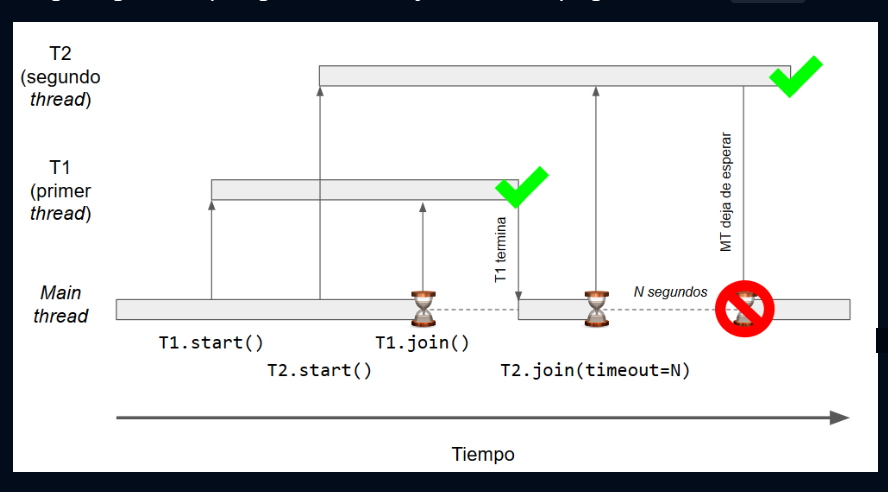


El compoortamiento de standar de joins() y stars es primero todos los starts() y luego los joins()

### is_alive()

Podemos saber si un thread esta vivo o no con el metodo is_alive()
Se usa despues del uso de join() al cual se le definio un timeout

```python

import threading
import time


# Usamos la definicion de los Thread declarados en el ejemplo anterior
# Se crean los threads usando la clase Thread.
hernan = CuentaOvejas("Hernán", 6)
daniela = CuentaOvejas("Daniela", 3)
fran = CuentaLiebres("Fran", 6)
joaquin = CuentaLiebres("Joaquín", 8)
paqui = CuentaLiebres("Paqui", 15)

# Se inicializan los threads creados
hernan.start()
daniela.start()
fran.start()
joaquin.start()
paqui.start()
print("Ayudantes: Los profes se fueron a la cama...")

daniela.join()  # Esperaremos lo que sea necesario.
print("Ayudantes: ¡DANIELA SE DURMIÓ!")
hernan.join() # No especificamos timeout, esperará lo que sea necesario
print("Ayudantes: ¡HERNÁN SE DURMIÓ!")
fran.join() # Esperaremos lo que sea necesario.
print("Ayudantes: ¡FRAN SE DURMIÓ!")
joaquin.join() # Esperaremos lo que sea necesario.
print("Ayudantes: ¡JOAQUÍN SE DURMIÓ!")
paqui.join(1)  # Esperaremos máximo 1 segundos después del último dormido, ya es muy tarde

if paqui.is_alive():
    print("Ayudantes: Paqui sigue despierta 😞. A la casa cabros.")
else:
    print("Ayudantes: ¡Todos los profes se durmieron! ¡A festejar!")
    for i in range(6):
        print("Ayudantes: 🎵🎶🎵🎶🎵🎶🎵🎶🎵🎶🎵🎶🎵🎶🎵🎶")
        time.sleep(1)

'''
Hernán tiene sueño...
Daniela tiene sueño...
Fran tiene sueño...
Joaquín tiene sueño...
Paqui tiene sueño...
Ayudantes: Los profes se fueron a la cama...
(Joaquín: 1 liebre)
(Joaquín: 2 liebres)
(Daniela: 1 oveja)
(Hernán: 1 oveja)
(Paqui: 1 liebre)
(Paqui: 2 liebres)
(Fran: 1 liebre)
(Fran: 2 liebres)
(Joaquín: 3 liebres)(Daniela: 2 ovejas)
(Hernán: 2 ovejas)

(Joaquín: 4 liebres)
(Paqui: 3 liebres)
(Paqui: 4 liebres)
(Fran: 3 liebres)
(Fran: 4 liebres)
(Joaquín: 5 liebres)(Paqui: 5 liebres)
(Paqui: 6 liebres)

(Joaquín: 6 liebres)
(Fran: 5 liebres)
(Fran: 6 liebres)
Fran a dormir...
Fran se durmió después de 3.050499677658081 seg.
(Daniela: 3 ovejas)
Daniela a dormir...
Daniela se durmió después de 3.050499677658081 seg.
Ayudantes: ¡DANIELA SE DURMIÓ!
(Hernán: 3 ovejas)
(Joaquín: 7 liebres)(Hernán: 4 ovejas)

(Joaquín: 8 liebres)
Joaquín a dormir...
Joaquín se durmió después de 4.070190191268921 seg.
(Paqui: 7 liebres)
(Paqui: 8 liebres)
(Hernán: 5 ovejas)(Paqui: 9 liebres)
(Paqui: 10 liebres)

(Paqui: 11 liebres)(Hernán: 6 ovejas)
Hernán a dormir...
Hernán se durmió después de 6.110394716262817 seg.
Ayudantes: ¡HERNÁN SE DURMIÓ!
Ayudantes: ¡FRAN SE DURMIÓ!
Ayudantes: ¡JOAQUÍN SE DURMIÓ!

(Paqui: 12 liebres)
(Paqui: 13 liebres)Ayudantes: Paqui sigue despierta 😞. A la casa cabros.

(Paqui: 14 liebres)
(Paqui: 15 liebres)
Paqui a dormir...
Paqui se durmió después de 8.150182008743286 seg.
'''

print("(Ayudantes vuelven)")
print("Ayudantes: Esperemos un poco más cabros...")
time.sleep(2)
for profe in [hernan, daniela, fran, joaquin, paqui]:
    if profe.is_alive():
        print(f"Ayudantes: {profe.name} aún está despiert@ 😞")
    else:
        print(f"Ayudantes: ¡{profe.name} se quedó dormid@!")

'''
(Ayudantes vuelven)
Ayudantes: Esperemos un poco más cabros...
Ayudantes: ¡Hernán se quedó dormid@!
Ayudantes: ¡Daniela se quedó dormid@!
Ayudantes: ¡Fran se quedó dormid@!
Ayudantes: ¡Joaquín se quedó dormid@!
Ayudantes: ¡Paqui se quedó dormid@!
'''
```

### Daemon threads

Podemos crear threads que se ejecuten en segundo plano, es decir, que no detengan la ejecución del programa principal. Estos threads se conocen como daemon threads.

AUnque esten ejecutandose el programa principal puede terminar sin esperar a que estos terminen.

**El programa termina cuando todos los threads no daemon terminan**
Se usa el parametro daemon=True al crear el thread

```python
import threading
import time


def dormilon():
    print(f"{threading.current_thread().name} tiene sueño...")
    time.sleep(2)
    print(f"{threading.current_thread().name} se durmió.")

    
def con_insomnio():
    print(f"{threading.current_thread().name} tiene sueño...")
    time.sleep(10)
    print(f"{threading.current_thread().name} se durmió.")


# Forma 1 de hacer un thread daemon
dormilon = threading.Thread(name="Dormilón", target=dormilon, daemon=True)
# Forma 2 de hacer un thread daemon
con_insomnio = threading.Thread(name="Con insomnio", target=con_insomnio)
con_insomnio.daemon = True

# Se inicializan los threads
dormilon.start()
con_insomnio.start()

```


Podmeos usar join() para eserar que aklgun daemon thread termine.

```python

import threading
import time


def dormilon():
    print(f"{threading.current_thread().name} tiene sueño...")
    time.sleep(2)
    print(f"{threading.current_thread().name} se durmió.")

    
def con_insomnio():
    print(f"{threading.current_thread().name} tiene sueño...")
    time.sleep(10)
    print(f"{threading.current_thread().name} se durmió.")


# Forma 1 de hacer un thread daemon
dormilon = threading.Thread(name="Dormilón", target=dormilon, daemon=True)
# Forma 2 de hacer un thread daemon
con_insomnio = threading.Thread(name="Con insomnio", target=con_insomnio)
con_insomnio.daemon = True

# Se inicializan los threads
dormilon.start()
con_insomnio.start()

# Esperamos los threads.
# Lo esperamos por una cantidad indefinida de tiempo
dormilon.join()
# Esperamos sólo 5 segundos
con_insomnio.join(5)

'''
Dormilón tiene sueño...
Con insomnio tiene sueño...
Dormilón se durmió.
Con insomnio se durmió.
'''

```

NO podemos cambair el daemon de un thread una vez que ha sido iniciado. Y viceversa


Con sub clases:

```python
class Daemon(threading.Thread):
    
    def __init__(self):
        super().__init__()
        # Cuando inicializamos el thread lo declaramos como daemon
        self.daemon = True
    
    def run(self):
        print("Daemon thread: Empezando...")
        time.sleep(2)
        print("Daemon thread: Terminando...")

        
daemon = Daemon()
daemon.start()
daemon.join()

'''
Daemon thread: Empezando...
Daemon thread: Terminando...
'''
```

Algo que puede suceder es si etsamos haciendo que un thread maneje prints
Puede dar error si el thread principal termina antes de que el thread termine de imprimir.

### Timers

La clase timer es una subclase de la clase thread y permite ejecutar una funcion despues de un tiempo determinado.

el metodo cancel() permite cancelar la ejecucuion del timer antes que este sea ejecutado.

```python
def mi_timer(ruta_archivo):
    with open(ruta_archivo) as archivo:
        for linea in archivo:
            print(linea.strip())

t1 = threading.Timer(4.0, mi_timer, args=("files/mensaje_01.txt",))
t2 = threading.Timer(1.0, mi_timer, kwargs={"ruta_archivo": "files/mensaje_02.txt"})

print("Activando timer 1 que comenzará luego de 4 segundos")
t1.start() # el thread t1 comenzará después de 4 seconds

print("Activando timer 2 que comenzará luego de 1 segundos")
t2.start() # el thread t2 comenzará después de 1 seconds

```


## Sinconización

Como funcionan lascosas pseudo paralelas??

Podemos creer que si dos threads hacen dos operaciones distintas como $10^6$ cada uno lo que esperariamos sería $ 2 \times 10^6$ operaciones. Sin embargo no es así como funciona.

Una forma de solucionarlo sería realizar la operacion de manera **Atomica** es decir que no se pueda interrumpir, un thread solo puede inicar si ningun otro la esta ejecutnado.

Cuando un conjunto de instrucciones se ejecutan de manera atomica se dice que es una **seccion critica**


## Mecanismos de sincronización

Lock es una primicvitima sincornización de threads provista por la clase lock de la libreria threading se utiiza para que solo un thread puede estar en una sección critica a la vez en otras palabras permita la sincroniczacion para el acesso a los recurso compratidos (2 o más threads).

Puede estar el lock **bloqueado** o **desbloqueado**

Inicialmente esta desbloqueado, si un thread necesita entrar a una sección critica primero debe adquirir el lock medieante el metodo acquire() y luego liberarlo con el metodo release()

Al salir desbloquea nuevamente el lock

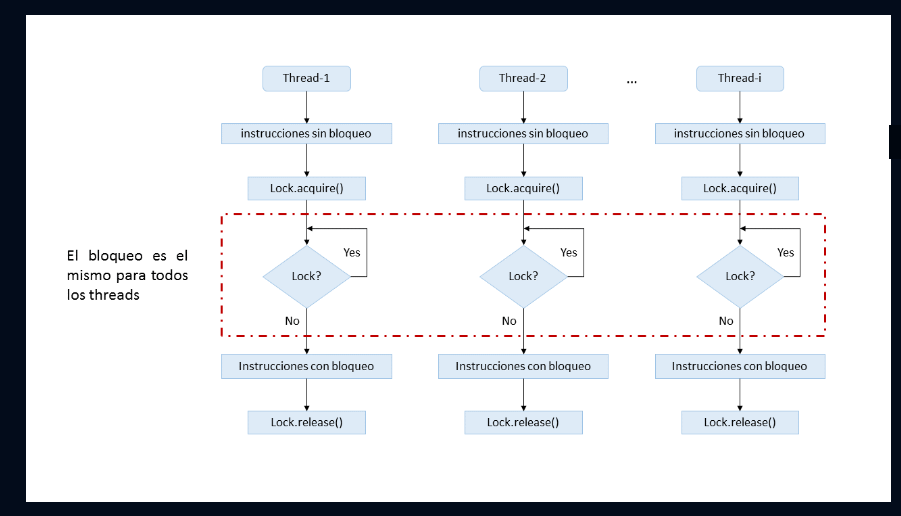

```python	
import threading

## El mismo lock para todos los threads
lock_global = threading.Lock()


def sumador_con_seccion_critica(contador, lock):
    for _ in range(10 ** 6):
        # Pedimos el lock antes de entrar a la sección crítica.
        lock.acquire()
        # --- Sección crítica ---. 
        # Está garantizado que en estas líneas sólo habrá un thread a la vez.
        contador.valor += int(1)
        # --- Fin de la sección crítica ---.
        # Liberamos el lock luego de salir de la sección crítica.
        lock.release()

contador = Contador()        
t1 = threading.Thread(target=sumador_con_seccion_critica, args=(contador,lock_global))
t2 = threading.Thread(target=sumador_con_seccion_critica, args=(contador,lock_global))

# Esto podría tomar algunos segundos...
t1.start()
t2.start()
t1.join()
t2.join()

print("Listo, nuestro contador vale", contador.valor)

'''
Listo, nuestro contador vale 2000000
'''
```

El llock debe ser gloooobal


No puede hacer que cada thread cree su lock eso no sulucionaria el problema

```python	

import threading

## Si cada thread usa su propio lock, no estamos protegiendonos
## de ningún acceso concurrente.


def sumador_con_seccion_critica_mala(contador):
    ## Cada thread crea su propio lock
    ## ESTO ESTÁ MAL 🙅‍♂️🙅‍♀️
    lock = threading.Lock()

    for _ in range(10 ** 6):
        # Pedimos el lock antes de entrar a la sección crítica.
        lock.acquire()
        # --- Sección crítica ---. 
        contador.valor += int(1)
        # --- Fin de la sección crítica ---.
        # Liberamos el lock luego de salir de la sección crítica.
        lock.release()
        
        
contador = Contador()        
t1 = threading.Thread(target=sumador_con_seccion_critica_mala, args=(contador,))
t2 = threading.Thread(target=sumador_con_seccion_critica_mala, args=(contador,))

t1.start()
t2.start()

t1.join()
t2.join()

print("Listo, nuestro contador vale", contador.valor)

'''
Listo, nuestro contador vale 1436449
'''
```

### Locks y Context Managers

Podemos usar locks como context managers con la sentencia with

```python
import time


lock_global = threading.Lock()


def sumador(contador, lock):
    nombre = threading.current_thread().name
    for _ in range(10):
        with lock:
            # --- Sección crítica ---. 
            # Está garantizado que en estas líneas sólo habrá un thread a la vez.
            valor = contador.valor
            print(f"{nombre}: lee {valor}")
            nuevo_valor = valor + 1
            print(f"{nombre}: suma 1 => {nuevo_valor}")
            contador.valor = nuevo_valor
            print(f"{nombre}: guarda {nuevo_valor}")
            time.sleep(1)
            # --- Fin de la sección crítica ---.

            
contador = Contador()        
t1 = threading.Thread(name="T1", target=sumador, args=(contador,lock_global))
t2 = threading.Thread(name="T2", target=sumador, args=(contador,lock_global))

t1.start()
t2.start()

t1.join()
t2.join()
```
Funciona perfecto.

### Señales entre threads: "Event"

Otro patron es la coordinacion de eventos, donde un thread espera a que otro thread le avise que algo ha ocurrido.

El Event es un objeto para su comincacion un thread hace una señal y el otro threas espera que ocurra, Tienen un flag, True y False.

* Un thread espera cion el metodo wait() hasta que el flag sea True

* Avvisar con el metro set() y resertaer con clear()

* Revisar con is_set() que devuelve bool

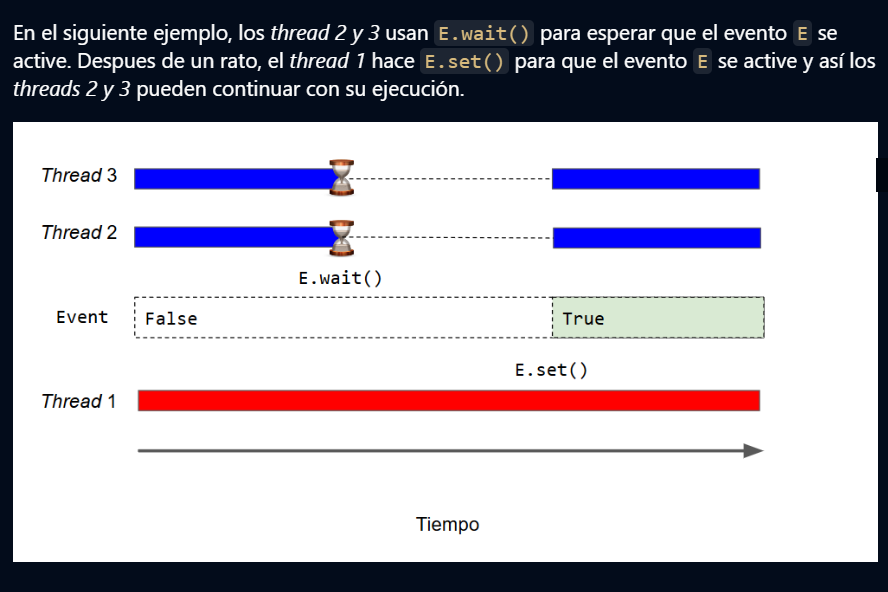


```python

# Ejemplo adaptado de http://zulko.github.io/blog/2013/09/19/a-basic-example-of-threads-synchronization-in-python/

import threading
import time


# Tenemos dos eventos o señales.
# Esta es para avisar que el video ya está listo para ser reproducido.
video_cargado = threading.Event()
# Esta es para avisar que el audio ya está listo para ser reproducido.
audio_cargado = threading.Event()

def hora_actual():
    return time.ctime().split(" ")[3]

    
def reproducir_video(nombre):
    print(f"[{hora_actual()}] Cargando video {nombre}. Se demorará 10 segundos\n")
    # Supongamos que se demora 10 segundos
    time.sleep(10)
    print(f"[{hora_actual()}] Video cargado. Esperando audio")
    # Avisamos que el video ya está cargado
    video_cargado.set()
    # Esperamos a que el audio ya se haya cargado
    audio_cargado.wait()
    # ¡Listo!
    print(f"[{hora_actual()}] Comenzando reproducción del video")
    
    
def reproducir_audio(nombre):
    print(f"[{hora_actual()}] Cargando audio {nombre}. Se demorará 3 segundos\n")
    # Supongamos que se demora 3 segundos
    time.sleep(3)
    print(f"[{hora_actual()}] Audio cargado. Esperando video")
    # Avisamos que el audio ya está cargado
    audio_cargado.set()
    # Esperamos a que el video ya se haya cargado
    video_cargado.wait()
    # ¡Listo!
    print(f"[{hora_actual()}] Comenzando reproducción del audio")
    
    
t1 = threading.Thread(target=reproducir_audio, args=("Your Name - Zen Zen Zense",))
t2 = threading.Thread(target=reproducir_video, args=("Your Name - Zen Zen Zense",))

t1.start()
t2.start()

t1.join()
t2.join()

'''
[8] Cargando audio Your Name - Zen Zen Zense. Se demorará 3 segundos

[8] Cargando video Your Name - Zen Zen Zense. Se demorará 10 segundos

[8] Audio cargado. Esperando video
[8] Video cargado. Esperando audio
[8] Comenzando reproducción del video
[8] Comenzando reproducción del audio
'''
```

Se hace uso de los metodos

set(), clear(), wait(), is_set()

# Deadlocks

Existen errores cuando se llamand dos locks al mismo tiempo y se bloquean entre si. Y por ende nunca termina el programa.

Ejemplo:

```python
import threading
import time


lock_1 = threading.Lock()
lock_2 = threading.Lock()


def master():
    time.sleep(2)
    print("Master: adquiriendo lock_1")
    with lock_1:
        time.sleep(2)
        print("Master: adquiriendo lock_2")
        with lock_2:
            print("Master: ¡trabajando!")


def worker():
    time.sleep(1.5)
    print("Worker: adquiriendo lock_2")
    with lock_2:
        time.sleep(2)
        print("Worker: adquiriendo lock_1")
        with lock_1:
            print("Worker: ¡trabajando!")


t1 = threading.Thread(target=master)
t2 = threading.Thread(target=worker)

t1.start()
t2.start()

'''
Worker: adquiriendo lock_2
Master: adquiriendo lock_1
Worker: adquiriendo lock_1
Master: adquiriendo lock_2
'''
```


Aqui sucede que master llama a lock_1 y worker llama a lock_2 y se bloquean entre si.

CUando master llama a lock2, debe esperar que worker libere lock2 y viceversa. Pero no puede porque worker debe esperar que master libre lock1

Lo mismo pasa con el ejemplo de señales, pero lo ponemos al reves.

```python
# Ejemplo adaptado de http://zulko.github.io/blog/2013/09/19/a-basic-example-of-threads-synchronization-in-python/

import threading
import time


# Tenemos dos eventos o señales.
# Esta es para avisar que el video ya está listo para ser reproducido.
video_cargado = threading.Event()
# Esta es para avisar que el audio ya está listo para ser reproducido.
audio_cargado = threading.Event()


def hora_actual():
    return time.ctime().split(" ")[3]


def reproducir_video(nombre):
    print(f"[{hora_actual()}] Cargando video {nombre}. Se demorará 10 segundos\n")
    time.sleep(10)
    print(f"[{hora_actual()}] Video cargado. Esperando audio")
    audio_cargado.wait()  # Esperar al audio
    video_cargado.set()  # Avisar que el video está listo

    print(f"[{hora_actual()}] Comenzando reproducción del video")


def reproducir_audio(nombre):
    print(f"[{hora_actual()}] Cargando audio {nombre}. Se demorará 3 segundos\n")
    time.sleep(3)
    print(f"[{hora_actual()}] Audio cargado. Esperando video")
    video_cargado.wait()  # Esperar al video
    audio_cargado.set()  # Avisar que el audio está listo

    print(f"[{hora_actual()}] Comenzando reproducción del audio")
    
    
t1 = threading.Thread(target=reproducir_audio, args=("Your Name - Zen Zen Zense",))
t2 = threading.Thread(target=reproducir_video, args=("Your Name - Zen Zen Zense",))

t1.start()
t2.start()

# Si descomentan las siguientes 2 líneas, la celda nunca se terminará de ejecutar.
# Puesto que esperará que t1 termine. Situación que no ocurrirá.

# t1.join() 
# t2.join()

'''
[8] Cargando audio Your Name - Zen Zen Zense. Se demorará 3 segundos

[8] Cargando video Your Name - Zen Zen Zense. Se demorará 10 segundos

[8] Audio cargado. Esperando video
[8] Video cargado. Esperando audio
[8] Comenzando reproducción del video
[8] Comenzando reproducción del audio
'''
```

Como el primer thread espera que el segundo termine y el segundo espera que el primero termine, nunca termina el programa.
 

## Ejemplos de Thread

## Lock como atributo de una subclase de Thread

Podemos reescribiur run e init

Podemos crear los locks que necestiemos como atributo de clase.

Así tendremos acceso a los locks en todos los metodos de la clase


* Atributo de instancia -> self.lock = threading.Lock()

* Atributo de clase -> cls.lock = threading.Lock()

* tambien se puede usar self -> self.lock = threading.Lock()
    Siempre y cuando no exitsa un atributo de clase con el mismo nombre

EL proceso es 1. Buscar en la instancia 2. Buscar en la clase

